<a href="https://colab.research.google.com/github/magjanvaz/curso-python-us/blob/main/notebooks/pandas/introduction-pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(pandas)=
# Pandas 

En esta sección haremos una introducción a la librería [pandas](https://pandas.pydata.org/) de Python, una herramienta muy útil para **el análisis de datos**. Proporciona estructuras de datos y operaciones para manipular y analizar datos de manera rápida y eficiente, así como funcionalidades de lectura y escritura de datos en diferentes formatos, como CSV, Excel, SQL, entre otros. También permite realizar operaciones matemáticas y estadísticas en los datos, así como visualizarlos en gráficos y tablas de manera cómoda gracias a su integración con **numpy** y **matplotlib**. En resumen, pandas es una librería muy útil para cualquier persona que trabaje con datos y necesite realizar análisis y operaciones en ellos de manera rápida y eficiente.

<div style="display: flex; align-items: center; justify-content: center;">
    <img src="https://drive.google.com/uc?id=1HTFx_ZaV6QywEjp_6Dd_NVe78L7oyzsX"/>
</div>

La integración entre numpy y pandas se realiza mediante el uso de los arrays de numpy como el tipo de dato subyacente en las estructuras de datos de pandas. Esto permite que pandas utilice la eficiencia y la velocidad de cálculo de numpy en sus operaciones, mientras que proporciona una interfaz de usuario más amigable y especializada para trabajar con datos tabulares.

Normalmente el módulo se suele importar con el alias `pd`

In [1]:
import pandas as pd
import numpy as np

## Series

Una **serie** de pandas es una estructura de datos unidimensional, junto con una secuencia de etiquetas para cada dato denominada **índice**. Podemos crear una serie de pandas a través de una lista de Python 

In [2]:
s = pd.Series([4, 7, -5, 3])
s

0    4
1    7
2   -5
3    3
dtype: int64

En este ejemplo vemos que pandas asigna por defecto un índice numérico que etiqueta los datos que le hemos pasado mediante la lista. Pandas gestiona estos datos como un array de numpy, que es accesible mediante el atributo `values`. También observamos que el tipo de numpy elegido ha sido `int64`

In [3]:
s.values

array([ 4,  7, -5,  3])

El índice está disponible en el atributo `index`. En este caso crea un objeto similar al `range` de Python, pero más generalmente serán instancias de `pd.Index`

In [4]:
s.index

RangeIndex(start=0, stop=4, step=1)

<div style="display: flex; align-items: center; justify-content: center;">
    <img src="https://drive.google.com/uc?id=17YVcnJlr72tSlmnyF8inGCNPXw-nUMD4"/>
</div>

Podemos proporcionar un índice cuando creemos la serie

In [5]:
s2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [6]:
s2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

También podemos añadirle un atributo `name` tanto `pd.Series` como a un índice

In [7]:
s2.name = "test"
s2.index.name = "letras"
s2

letras
d    4
b    7
a   -5
c    3
Name: test, dtype: int64

La noción de índice en pandas generaliza en cierto sentido los índices de numpy. Igual que en numpy, podemos acceder a los elementos de la series a través del índice y modificarlos

In [8]:
s2["a"]

-5

In [9]:
s2["a"] = 6
s2

letras
d    4
b    7
a    6
c    3
Name: test, dtype: int64

Podemos tambíen indicar una subserie

In [10]:
s2[['c', 'a', 'd']]

letras
c    3
a    6
d    4
Name: test, dtype: int64

Las operaciones que estarían disponibles sobre el array subyacente a la serie se pueden aplicar directemante a la misma 

In [11]:
s2[s2 > 5]

letras
b    7
a    6
Name: test, dtype: int64

In [12]:
s2*2

letras
d     8
b    14
a    12
c     6
Name: test, dtype: int64

In [13]:
np.exp(s2)

letras
d      54.598150
b    1096.633158
a     403.428793
c      20.085537
Name: test, dtype: float64

De hecho, una manera muy frecuente de crear una serie es a partir de un diccionario. Las claves se ordenarán y formarán el índice de la serie, como en el siguiente ejemplo:

In [14]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
s3 = pd.Series(sdata)
s3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

Si queremos introducir un orden específico entre las claves del diccionario, entonces podemos combinar el pasar el diccionario junto con la lista de etiquetas ordenadas:

In [15]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
s4 = pd.Series(sdata, index=states)
s4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [18]:
np.array([1,0,np.nan,2]).sum()
# podemos ver que en cuanto hay un NA no puede sumar

nan

Nótese que solo se incluye en el índice lo incluido en la lista (por ejemplo `Utah` no forma parte del índice a pesar de que es una clave del diccionario). Como `California` no es una clave del diccionario, pero se ha incluido en el índice, se incluye con valor `NaN`(*Not a Number*), que es la manera en pandas para indicar valores inexistentes. 

Con `isnull` podemos localizar qué entradas de la serie tienen valores inexistentes:

In [16]:
s4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

En las series, como con los arrays de numpy, podemos realizar operaciones vectorizadas. Lo interesante aquí es que las operaciones se *alinean* por las correspondientes etiquetas. Por ejemplo:

In [21]:
s3 + s4
# si está en ambos, se suman los valores

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Los tipos que solemos manejar en las series de pandas son similares que los de numpy, aunque existe un tipo particular de pandas bastante útil, que nos permite usar funcionalidades y ahorrar memoria, el tipo `category`

In [22]:
s = pd.Series(
    ["s", "m", "l", "xs", "xl"], 
    dtype="category"
)
s

0     s
1     m
2     l
3    xs
4    xl
dtype: category
Categories (5, object): ['l', 'm', 's', 'xl', 'xs']

:::{exercise}
:label: pandas-series

Carga las series `city_mpg` y `highway_mpg` con el siguiente código
```
url = "https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip"
df = pd.read_csv(url)
city_mpg = df.city08
highway_mpg = df.highway08
``` 
- ¿Cuántos elementos hay en las series? ¿De qué tipo son? 
- Calcula el mínimo, el máximo y la mediana de la Serie utilizando las funciones `min`, `max` y `median` respectivamente.
- Utiliza la función `pd.cut` para dividir la Serie en cuatro categorías: "bajo", "medio-bajo", "medio-alto" y "alto", utilizando los cuartiles como límites de las categorías.
- Cuenta el número de elementos en cada categoría utilizando la función `value_counts`.
- Realiza un histograma y un gráfico de barras.

:::

In [23]:
url = "https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip"
df = pd.read_csv(url)
city_mpg = df.city08
highway_mpg = df.highway08

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [32]:
len(city_mpg), city_mpg # tiene 41144 elementos

(41144, 0        19
 1         9
 2        23
 3        10
 4        17
          ..
 41139    19
 41140    20
 41141    18
 41142    18
 41143    16
 Name: city08, Length: 41144, dtype: int64)

In [33]:
len(highway_mpg),highway_mpg # tiene 41144 elementos también

(41144, 0        25
 1        14
 2        33
 3        12
 4        23
          ..
 41139    26
 41140    28
 41141    24
 41142    24
 41143    21
 Name: highway08, Length: 41144, dtype: int64)

In [29]:
city_mpg.min(), city_mpg.max(),city_mpg.median()

(6, 150, 17.0)

In [30]:
highway_mpg.min(), highway_mpg.max(), highway_mpg.median()

(9, 124, 24.0)

In [35]:
# también podría haberse hecho como
np.min(highway_mpg), np.max(highway_mpg),np.median(highway_mpg)

(9, 124, 24.0)

In [63]:
s = city_mpg

In [48]:
# ?pd.cut
pd.cut(s,2,labels=["Bajo","Alto"])
# esto lo hace con equal.width

0        Bajo
1        Bajo
2        Bajo
3        Bajo
4        Bajo
         ... 
41139    Bajo
41140    Bajo
41141    Bajo
41142    Bajo
41143    Bajo
Name: city08, Length: 41144, dtype: category
Categories (2, object): ['Bajo' < 'Alto']

In [64]:
s_cat = pd.cut(
    s,
    4,
    [6,12,17,25,150],
    labels=["bajo","medio-bajo","medio-alto","alto"]
)
s_cat

0        bajo
1        bajo
2        bajo
3        bajo
4        bajo
         ... 
41139    bajo
41140    bajo
41141    bajo
41142    bajo
41143    bajo
Name: city08, Length: 41144, dtype: category
Categories (4, object): ['bajo' < 'medio-bajo' < 'medio-alto' < 'alto']

In [53]:
s_cat.value_counts(), s_cat.value_counts(normalize=True)

(bajo          40810
 medio-bajo      161
 medio-alto       90
 alto             83
 Name: city08, dtype: int64, bajo          0.991882
 medio-bajo    0.003913
 medio-alto    0.002187
 alto          0.002017
 Name: city08, dtype: float64)

In [52]:
s.value_counts()

15     4503
18     4053
17     4035
16     3975
19     3012
       ... 
127       1
114       1
140       1
115       1
104       1
Name: city08, Length: 105, dtype: int64

In [54]:
import matplotlib.pyplot as plt

In [60]:
plt.style.use("seaborn-whitegrid")

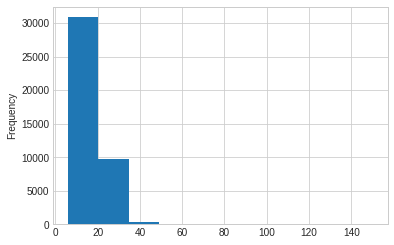

In [62]:
# histograma

# opción 1: llamar a matplotlib pasando objetos de pandas
fig, ax = plt.subplots()

# ax.hist(s, bins=50)

# opción 2: 
s.plot.hist(ax = ax)
fig.show()


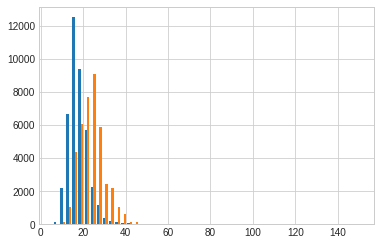

In [66]:
fig, ax= plt.subplots()

ax.hist([city_mpg, highway_mpg], bins=50)

fig.show()

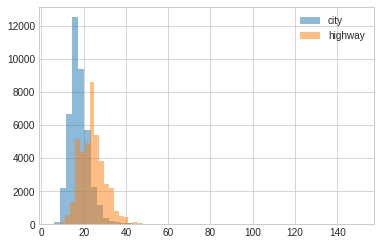

In [67]:
fig, ax= plt.subplots()

ax.hist(city_mpg, bins=50, label="city", alpha=0.5)
ax.hist(highway_mpg, bins=50, label="highway", alpha=0.5)

ax.legend()

fig.show()

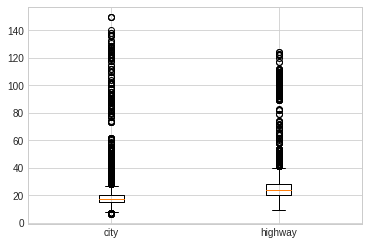

In [70]:
fig, ax= plt.subplots()

ax.boxplot([city_mpg, highway_mpg], labels=["city","highway"])

fig.show()

## DataFrames

Un **DataFrame** de pandas es una tabla bidimensional, con las columnas y las filas en un determinado orden. Cada columna puede ser de un tipo diferente. En términos de índices: tanto las filas como las columnas están indexadas. 

> Puede ver un DataFrame como un diccionario en el que las claves son las etiquetas de las columnas, y todos los valores son **Series** de pandas que comparten el mismo índice. 

Aunque hay muchas maneras de crear un *DataFrame*, una de las más frecuentes es mediante un diccionario cuyos valores asociados a las claves son listas de la misma longitud. Por ejemplo:   

In [71]:
data = {
    'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
    'year': [2000, 2001, 2002, 2001, 2002, 2003],
    'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]
}
frame = pd.DataFrame(data)

Nótese la forma en que se muestra un *DataFrame* en Jupyter:

In [73]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


Podemos obtener infomación del DataFrame con el método `info`

In [74]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   6 non-null      object 
 1   year    6 non-null      int64  
 2   pop     6 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 272.0+ bytes


Cuando los *DataFrames* son grandes, puede ser útil el método `head`, que muestar solo las primeras $n$ filas de la tabla:

In [77]:
print(frame.head())
print(frame.head(2))

    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
  state  year  pop
0  Ohio  2000  1.5
1  Ohio  2001  1.7


Como en el caso de las Series, podemos proporcionar las columnas en un orden determinado: 

In [78]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


Y también podemos indicar expresamente el índice de las filas:

In [79]:
pd.DataFrame(
    data, 
    columns=['pop', 'year', 'state'], 
    index=['one', 'two', 'three', 'four', 'five', 'six']
)

,pop,year,state
one,1.5,2000,Ohio
two,1.7,2001,Ohio
three,3.6,2002,Ohio
four,2.4,2001,Nevada
five,2.9,2002,Nevada
six,3.2,2003,Nevada


Si al proporcionar los nombres de las columnas damos una de ellas que no aparece en el diccionario con los datos, entonces se crea la columnos con valores no determinados:

In [80]:
df2 = pd.DataFrame(
    data, 
    columns=['year', 'state', 'pop', 'debt'],
    index=['one', 'two', 'three', 'four', 'five', 'six']
)
df2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


Los atributos `index` y `columns` nos devuelven los correspondientes índices de las filas y de las columnas (ambos son objetos `Index` de pandas): 

In [81]:
df2.index

Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

In [82]:
df2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

Para acceder a una columna en concreto del *DataFrame*, podemos hacerlo usando la notación de diccionario, o también como atributo. En ambos casos se devuelve la correspondiente columna como un objeto *Series* de pandas: 

In [83]:
df2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [84]:
df2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

De igual manera, podemos acceder a una fila del *DataFrame* mediante el método `loc`, que veremos con más detenimiento en lo siguiente. La fila también se devuelve como un objeto *Series*, cuyo índice está formado por los nombres de las columnas:

In [85]:
df2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

Veamos ahora ejemplos sobre cómo podemos modificar columnas mediante asignaciones. En general, muchas de los procedimientos de numpy aquí también son válidos, pero teniendo en cuenta que indexamos mediante el nombre de la columna: 

Por ejemplo, asignar el mismo valor a toda una columna:

In [86]:
df2['debt'] = 16.5
df2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


O asignar mediante una secuencia:

In [87]:
df2['debt'] = np.arange(6.)
df2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


Cuando a una columna le asignamos una lista o un array, como en el ejemplo anterior, la longitud de la secuencia debe de coincidir con el número de filas del *DataFrame*. Sin embargo, podemos asignar con un objeto *Series* y los valores se asignarán alineando por el valor del índice, incluso parcialmente (al resto se el asignará *NaN*):

In [88]:
val = pd.Series(
    [-1.2, -1.5, -1.7], 
    index=['two', 'four', 'five']
)
df2['debt'] = val
df2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


Si asignamos una columna que no existe, ésta se creará. Por ejemplo:

In [89]:
df2['eastern'] = df2.state == 'Ohio'
df2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


Podemos borrar una colunma con el método `drop`

In [90]:
df2.drop(columns="eastern", inplace=True)
# alternativa -> del df2['eastern']
df2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [91]:
df2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


Otra forma de crear un *DataFrame* es a partir de un diccionario de diccionarios, en el que las claves externas constituyen las etiquetas de las columnas, y las internas como las de las filas:

In [92]:
pop = {
    'Nevada': {2001: 2.4, 2002: 2.9},
    'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}
}

In [93]:
df3 = pd.DataFrame(pop)
df3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Como en numpy, podemos también obtener la traspuesta de un *DataFrame*, quedando las filas como columns y viceversa:

In [94]:
df3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


También se puede dar un *DataFrame* como un diccionario en el que cada clave (columna) tiene asociada una serie: 

In [95]:
pdata = {
    'Ohio': df3['Ohio'][:-1],
    'Nevada': df3['Nevada'][:2]
}
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


Con el atributo `name` (tanto de `index`como de `columns`) podemos acceder y/o modificar el nombre de las filas y las columnas, que se mostrarán al mostrarse la tabla:

In [100]:
df3.index.name = 'year'
df3.columns.name = 'state'
df3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Por último, mediante `values`, accedemos a un array bidimensional con los valores de cada entrada de la tabla:

In [101]:
df3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [102]:
df2.values # el dtype se acomoda a lo más general. 

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

#### Resumen de algunas maneras de crear un *DataFrame*:

* Array bidimensional, opcionalmente con `index` y/o `columns`
* Diccionario de arrays, listas o tuplas de la misma longitud; cada clave se refiere a una columna
* Diccionario de *Series*; cada clave es una columna y las filas se alinean según los índices de las series, o bien se le pasa explícitamente el índice. 
* Diccionario de diccionarios: las claves externas son las columnas, las internas las filas.
* Lista de listas o tuplas: como en el caso de array bidimensional. 

:::{exercise}
:label: pandas-create-df

Crea un DataFrame de 5 filas y columnas `Nombre`, `Edad`, `Peso` con alguno de los métodos mencionados arriba. 

:::

In [107]:
ejemplo = {
    'Nombre' : ['A','M','MM','I', 'N'],
    'Edad' : [18,22,23,60,56],
    'Peso' : [65,50,58,60,52]
}

ejDF = pd.DataFrame(ejemplo)
ejDF

,Nombre,Edad,Peso
0,A,18,65
1,M,22,50
2,MM,23,58
3,I,60,60
4,N,56,52


In [109]:
df = pd.DataFrame(
    [['a',12,40],
     ['b',15,50],
     ['c',35,70],
     ['d',20,55],
     ['e',70,40]],
    columns=["Nombre","Edad","Peso"]
)
df

,Nombre,Edad,Peso
0,a,12,40
1,b,15,50
2,c,35,70
3,d,20,55
4,e,70,40


## Funcionalidades básicas

### Eliminando entradas de un eje

Mediante `drop`, podemos *crear nuevos objetos* resultantes de eliminar filas o columnas completas. Veamos algunos ejemplos. En primer lugar, con las *Series*:

In [110]:
s = pd.Series(
    np.arange(5.), 
    index=['a', 'b', 'c', 'd', 'e']
)
s

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [111]:
new_s = s.drop('c') # notemos que inplace=False (valor por defecto)
new_s

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [112]:
# varias entradas a la vez
s.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [116]:
s # como hicimos inplace=FALSE no se altera s

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

Ahora veamos el uso de `drop` con *DataFrames*:

In [114]:
data = pd.DataFrame(
    np.arange(16).reshape((4, 4)),
    index=['Ohio', 'Colorado', 'Utah', 'New York'],
    columns=['one', 'two', 'three', 'four']
)
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Por defecto, se eliminan del eje 0 (las filas):

In [115]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


Podemos eliminar columnas, indicándo que se quiere hacer en `axis=1` o `axis='columns'`:

In [117]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [118]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


Como hemos dicho, por defecto, `drop` devuelve un nuevo objeto. Pero como otras funciones, podrían actuar de manera destructiva, **modificando el objeto original**. Para ello, hay que indicarlo con el argumento clave `inplace`:

In [120]:
s.drop('c', inplace=True)
s

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

### Indexado, selección y filtrado

El acceso a los elementos de un objeto *Series* se hace de manera similar a los arrays de numpy, excepto que también podemos usar el correspondiente valor del índice, además de la posición numérica. Veámoslo con un ejemplo: 

In [121]:
s = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
s

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

Podemos acceder al segundo elemento de la serie anterir, bien mediante el valor `'b'`, o por la posición 1, ambos accesos son equivalentes:

In [122]:
s['b'], s[1]

(1.0, 1.0)

Más ejemplos de indexado en objetos de tipo *Series*:

In [123]:
s[2:4]

c    2.0
d    3.0
dtype: float64

In [124]:
s[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [125]:
s[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [126]:
s[s < 2]

a    0.0
b    1.0
dtype: float64

Podemos hacer también *slicing* con las etiquetas de un índice. Existe una diferencia importante, y es que el límite superior se considera incluido:

In [127]:
s['b':'c']

b    1.0
c    2.0
dtype: float64

Podemos incluso hacer **asignaciones** usando *slicing*, como en los arrays de numpy:

In [128]:
s['b':'c'] = 5
s

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

Para *DataFrames*, el acceso mediante una etiqueta, extrae por defecto la correspondiente columna en forma de Series, como ya habíamos visto anteriormente. En el siguiente ejemplo: 

In [129]:
data = pd.DataFrame(
    np.arange(16).reshape((4, 4)),
    index=['Ohio', 'Colorado', 'Utah', 'New York'],
    columns=['one', 'two', 'three', 'four']
)
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [130]:
data['two'] ### 

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

También se admite indexado mediante una lista de etiquetas:

In [131]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


Hay un par de casos particulares, que no funciona seleccionando columnas: si hacemos slicing con enteros, nos estamos refiriendo a las filas:

In [132]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


También el indexado booleano filtar por filas:

In [133]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### Selección con loc e iloc

Además de los métodos directos de indexado que acabamos de ver, existen otros dos métodos para seleccionar datos en pandas

- `loc`: es manera de acceder a los datos de un *DataFrame* usando las etiquetas de las filas y columnas. También se utiliza para indexar con booleanos.

- `iloc`: podemos usar índices enteros, como con numpy. 

Veamos algunos ejemplos.

In [134]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Para acceder a la fila etiquetada como `Colorado` y sólo a las columnas `two` y `three`, en ese orden (nótese que se devuelve una serie):

In [135]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

Un ejemplo, similar, pero ahora con índices numéricos. La fila de índice 2, sólo con las columnas 3, 0 y 1. 

In [136]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

La fila de índice 2:

In [137]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

Podemos especificar una subtabla por sus filas y columnas

In [138]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,4,5
Utah,11,8,9


Podemos usar slicing con las etiquetas (recordar que el límite superior es inclusive):

In [139]:
data.loc[:'Utah', 'two']

Ohio        1
Colorado    5
Utah        9
Name: two, dtype: int64

Un ejemplo algo más complicado. Seleccionamos primero las tres primeras columnas mediante slicing con enteros, y luego seleccionamos las filas que en la columna etiquetada con `'three'` tienen un valor mayor que 5:

In [140]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


:::{exercise}
:label: pandas-loc-iloc

Carga el siguiente dataframe
```
url = "https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip"
df = pd.read_csv(url)
```
- Utiliza el método `set_index` para hacer que la columna `make` se convierta en el índice
- Devuelve las primera 3 filas que corresponden a `make == 'Ferrari'`.
- Devuelve las 5 primeras columnas de aquellas filas que tengan `city08` mayor que 50

:::

In [141]:
url = "https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip"
df = pd.read_csv(url)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [150]:
print(df.head(3))
print(df.info())

   barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  15.695714         0.0        0.0        0.0      19      0.0        0   
1  29.964545         0.0        0.0        0.0       9      0.0        0   
2  12.207778         0.0        0.0        0.0      23      0.0        0   

   cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
0       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
1       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
2       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   

                      createdOn                    modifiedOn  startStop  \
0  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
1  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
2  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   

   phevCity  phevHwy  phevComb  
0         0        0         0  
1         0    

In [151]:
df = df.set_index("make")

In [155]:
df.loc["Ferrari"].iloc[:3]
# con loc podemos buscar en el índice

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
make,,,,,,,,,,,,,,,,,,,,,
Ferrari,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
Ferrari,23.543571,0.0,0.0,0.0,12,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
Ferrari,25.354615,0.0,0.0,0.0,11,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [156]:
df.loc[df.city08 > 50].iloc[:,:5]

,barrels08,barrelsA08,charge120,charge240,city08
make,,,,,
Nissan,0.240000,0.000000,0.0,0.0,81
Toyota,0.282000,0.000000,0.0,0.0,81
Toyota,0.282000,0.000000,0.0,0.0,81
Ford,0.312000,0.000000,0.0,0.0,74
Nissan,0.270000,0.000000,0.0,0.0,84
...,...,...,...,...,...
Tesla,0.150000,0.000000,0.0,9.5,140
Tesla,0.180000,0.000000,0.0,12.0,115
Tesla,0.192000,0.000000,0.0,12.0,104


### Operaciones aritméticas con valores de relleno

In [157]:
df1 = pd.DataFrame(
    np.arange(12.).reshape((3, 4)),
    columns=list('abcd')
)
df2 = pd.DataFrame(
    np.arange(20.).reshape((4, 5)),
    columns=list('abcde')
)

df1.loc[1, 'b'] = np.nan
df2.loc[1, 'b'] = np.nan

In [158]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,NaN,6.0,7.0
2,8.0,9.0,10.0,11.0


In [159]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


Al sumar ambos *DataFrames*,téngase en cuanta que la fila 3 no existe en una de ellas, al igual que la columna `'e'`. Por tanto, en el resultado, se crearán en esas fila y columna con valores no determinados: 

In [160]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


Sin embargo, podemos usar el método `add` con "valor de relleno" 0, y en ese caso, cuando uno de los operandos no esté definido, se tome ese valor por defecto (cero en este caso). Nótese que si ninguno de los operandos está definido (como en `(1,'b')`), entonces no se aplica el relleno. 

In [161]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,NaN,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


Como `add`, existe otras operaciones aritméticas que permiten `fill_value`: `sub`, `mul`, `div`, `pow`, ...

Relacionado con esto, también es interesante destacar que cuando se reindexa un objeto, podemos especificar el valor de relleno, cuando el valor no esté especificado en el objeto original:

In [162]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,NaN,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


### Aplicación de funciones a las "vectorizadas"

Como en numpy, podemos aplicar funciones de forma vectorizada a todos los valores de un *Series* o un *DataFrame*:

In [163]:
frame = pd.DataFrame(
    np.random.randn(4, 3), 
    columns=list('bde'),
    index=['Utah', 'Ohio', 'Texas', 'Oregon']
)
frame

,b,d,e
Utah,0.545976,2.573210,-0.241083
Ohio,-2.235077,2.048718,-0.245043
Texas,1.591326,-0.253099,-0.115078
Oregon,-0.192643,1.543739,0.838856


Por ejemplo, aplicamos valor absoluto a cada elemento de la tabla:

In [164]:
np.abs(frame)

,b,d,e
Utah,0.545976,2.573210,0.241083
Ohio,2.235077,2.048718,0.245043
Texas,1.591326,0.253099,0.115078
Oregon,0.192643,1.543739,0.838856


Otra operación muy frecuente consiste en aplicar una función definida sobre arrays unidimensionales, a lo largo de uno de los ejes (filas o columnas). Esto se hace con el método `apply` de los *DataFrames*.

Supongamos que queremos calcular la diferencia entre el máximo y el mínimo de cada columna de una tabla. Lo podemos hacer así:

In [165]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    3.826403
d    2.826309
e    1.083899
dtype: float64

El eje por defecto para hacer un `apply` es el 0, es decir el de las filas (y por tanto aplica la opración sobre cada columna). Podemos usar el argumento `axis` para especificar que queremos aplicar en el sentido de las columnas (y por tanto, hacer el cálculo sobre las filas): 

In [166]:
frame.apply(f, axis='columns')

Utah      2.814294
Ohio      4.283795
Texas     1.844425
Oregon    1.736382
dtype: float64

En realidad, hay muchas funciones (como `sum` o `mean`) que de por sí ya están adaptadas a *DataFrames* y no necesitan usar apply, como veremos más adelante. 

Compara las siguientes ejecuciones usando `apply` recorriendo filas o una función vectorizada

In [167]:
url = "https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip"
df = pd.read_csv(url)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [168]:
def gt20(val):
    return val > 20

In [169]:
%%timeit 
df.city08.apply(gt20)

7.53 ms ± 254 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [177]:
%%timeit 
df.city08 > 20

306 µs ± 149 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


:::{exercise}
:label: pandas-vfunctions

Selecciona las columnas numéricas de `df` con el método `select_dtypes` y normaliza las columnas.

:::

In [181]:
def normaliza(col):
  sd = col.std()
  if sd == 0:
    return 0
  else: 
    return (col - col.mean())/sd

In [182]:
df.select_dtypes("number").apply(normaliza)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
0,-0.343523,-0.193085,0,-0.074428,0.079808,-0.513433,-0.127412,-0.102458,-0.011901,-0.085193,...,0.011493,-0.11755,0.058285,-0.147323,-1.483993,0.550349,-0.041603,-0.052047,-0.054149,-0.053077
1,2.742810,-0.193085,0,-0.074428,-1.185072,-0.513433,-0.127412,-0.102458,-0.011901,-0.085193,...,-1.086522,-0.11755,-1.362768,-0.147323,-1.483993,-2.268230,-0.041603,-0.052047,-0.054149,-0.053077
2,-1.097960,-0.193085,0,-0.074428,0.585760,-0.513433,-0.127412,-0.102458,-0.011901,-0.085193,...,0.515991,-0.11755,1.124075,-0.147323,-1.483993,1.235949,-0.041603,-0.052047,-0.054149,-0.053077
3,2.742810,-0.193085,0,-0.074428,-1.058584,-0.513433,-0.127412,-0.102458,-0.011901,-0.085193,...,-0.977712,-0.11755,-1.570002,-0.147323,-1.483993,-2.268230,-0.041603,-0.052047,-0.054149,-0.053077
4,0.013842,-0.193085,0,-0.074428,-0.173168,-0.513433,-0.127412,-0.102458,-0.011901,-0.085193,...,-0.196237,-0.11755,-0.208162,-0.147323,-0.766016,-0.516140,-0.041603,-0.052047,-0.054149,-0.053077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41139,-0.497839,-0.193085,0,-0.074428,0.079808,-0.513433,-0.127412,-0.102458,-0.011901,-0.085193,...,0.070848,-0.11755,0.235917,-0.147323,-0.766016,0.702704,-0.041603,-0.052047,-0.054149,-0.053077
41140,-0.638737,-0.193085,0,-0.074428,0.206296,-0.513433,-0.127412,-0.102458,-0.011901,-0.085193,...,0.159877,-0.11755,0.413549,-0.147323,-0.766016,0.778882,-0.041603,-0.052047,-0.054149,-0.053077
41141,-0.343523,-0.193085,0,-0.074428,-0.046680,-0.513433,-0.127412,-0.102458,-0.011901,-0.085193,...,-0.018180,-0.11755,-0.030531,-0.147323,-0.766016,0.550349,-0.041603,-0.052047,-0.054149,-0.053077
41142,-0.343523,-0.193085,0,-0.074428,-0.046680,-0.513433,-0.127412,-0.102458,-0.011901,-0.085193,...,-0.018180,-0.11755,-0.030531,-0.147323,-0.766016,0.550349,-0.041603,-0.052047,-0.054149,-0.053077


## Ordenación

En pandas tenemos posibilidad de ordenar bien teniendo en cuenta las etiquetas de las filas o columnas, o bien con los valores propiamente dichos:

Comenzamos con un ejemplo con *Series*:

In [ ]:
s = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
s

d    0
a    1
b    2
c    3
dtype: int64

Con `sort_index` ordenamos la serie por las etiquetas del índice:

In [ ]:
s.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

Con *DataFrame*, podemos ordenar por las etiquetas de las filas, o también por las columnas, usando el argumento `axis`:

In [ ]:
frame = pd.DataFrame(
    np.arange(8).reshape((2, 4)),
    index=['three', 'one'],
    columns=['d', 'a', 'b', 'c']
)
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [ ]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [ ]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [ ]:
frame.sort_index(axis=1, ascending=False) # se puede especificar si es ascendente o descendente

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


Con `sort_values`, ordenamos por los valores de las entradas. Por ejemplo, en una serie:

In [ ]:
s = pd.Series([4, 7, -3, 2])
s.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

Si ordenamos por valores, los *NaN* se sitúan al final:

In [ ]:
s = pd.Series([4, np.nan, 7, np.nan, -3, 2])
s.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

Con `sort_values` aplicado a *DataFrames*, podemos ordenar por el valor de alguna columna, o incluso por el valor de una fila, usando el argumento clave `'by'`:

In [ ]:
frame = pd.DataFrame(
    {
        'b': [4, 7, -3, 2], 
        'a': [0, 1, 0, 1]
    },
    index=['j','k','l','m']
)
frame

,b,a
j,4,0
k,7,1
l,-3,0
m,2,1


Ordenación de la tabla según la columna `'b'`:

In [ ]:
frame.sort_values(by='b')

,b,a
l,-3,0
m,2,1
j,4,0
k,7,1


Por el valor de dos columnas (lexicográficamente):

In [ ]:
frame.sort_values(by=['a', 'b'])

,b,a
l,-3,0
j,4,0
m,2,1
k,7,1


Por el valor de una fila:

In [ ]:
frame.sort_values(axis=1, by='k')

,a,b
j,0,4
k,1,7
l,0,-3
m,1,2


## Funciones estadísticas descriptivas

Los objetos de pandas incorporan una serie de métodos estadísticos que calculan un valor a partir de los valores de una serie o de filas o columnas de un *DataFrame*. Una particularidad interesante es que manejan adecuadamente los valores no especificados. Veamos algunos ejemplos:

In [ ]:
frame = pd.DataFrame(
    [
        [1.4, np.nan], 
        [7.1, -4.5], 
        [np.nan, np.nan], 
        [0.75, -1.3]
    ],
    index=['a', 'b', 'c', 'd'],
    columns=['one', 'two']
)
frame

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


Por defecto, el método `sum` calcula la suma de cada columna de un *DataFrame*. Los valores NaN se tratan como 0 (a no ser que toda la serie sea de valores NaN):

In [ ]:
frame.sum()

one    9.25
two   -5.80
dtype: float64

Como es habitual, con el parámetro `axis` podemos hacerlo por el eje de las columnas:

In [ ]:
frame.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

Con `mean` calculamos la media de filas o columnas según el eje elegido con *axis*. El parámetro `skipna` nos permite indicar si se excluyen o no los valores NaN:

In [ ]:
frame.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

El método `idxmax` nos da la etiqueta donde se alcanza el mínimo de cada columna (o cada fila)

In [ ]:
frame.idxmax()

one    b
two    d
dtype: object

El método `cumsum` nos da los acumulados por fila o por columna:

In [ ]:
frame.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


Por último el método `describe` produce un resumen con las estadísticas más importantes:

In [ ]:
frame.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


Para tipos no numéricos, `describe` también devuelve información

In [ ]:
s = pd.Series(['a', 'a', 'b', 'c'] * 4)
s.describe()

count     16
unique     3
top        a
freq       8
dtype: object

:::{exercise}
:label: pandas-housing

Descarga el dataframe `housing` utilizando el siguiente código

```
import os
import tarfile
import urllib
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("data", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()
housing = load_housing_data()
```

Realiza un análisis rápido de las variables númericas y categóricas. Rellena los valores faltantes con `fillna` y realiza las visualizaciones que veas adecuadas.

:::